In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("36100412.csv")
data = data[["REF_DATE", "Canada's international investment position", "Currency", "VALUE"]]
data = data[data["Currency"] != "All currencies"]

In [4]:
data.set_index("REF_DATE", inplace = True, drop = False)

In [5]:
curr = np.array(data["Currency"].unique())
inve = np.array(["Total assets", "Total liabilities", "Canada's net international investment position"])

In [6]:
data = data[data["Canada's international investment position"].map(lambda x: x in inve)]
data["absVALUE"] = data["VALUE"].abs()

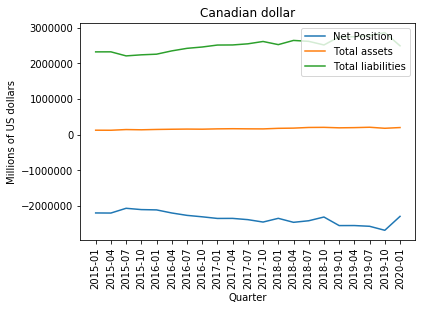

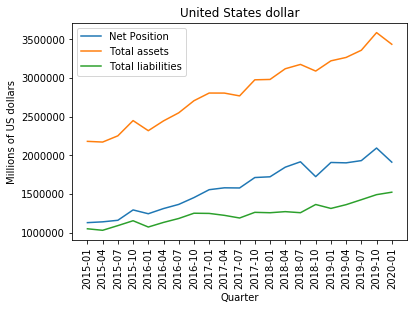

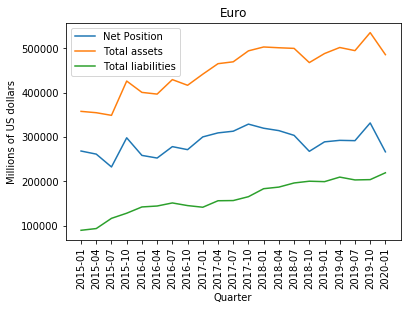

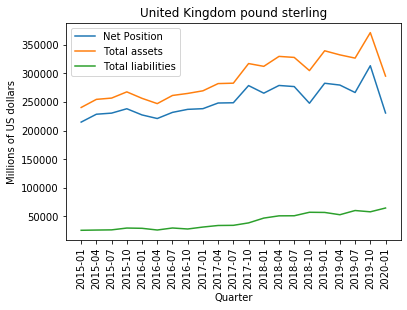

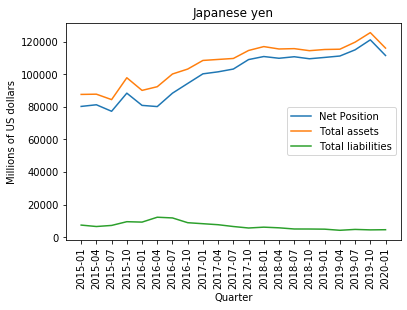

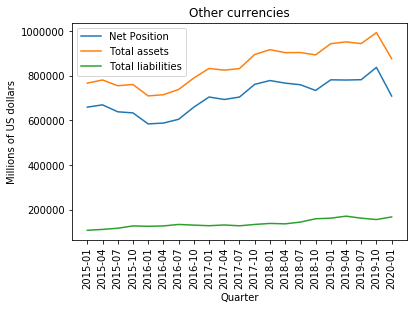

In [7]:
dateNames = list(data.index.unique())
for currency in curr:
    fig, axis = plt.subplots()
    axis.set_xticks(np.arange(len(dateNames)))
    axis.set_xticklabels(dateNames)
    for name, group in data[data["Currency"] == currency].groupby("Canada's international investment position"):
        group.plot(ax = axis, y = "VALUE", title = currency, label = name if name != "Canada's net international investment position" else "Net Position")
    plt.xticks(rotation = 90)
    plt.xlabel("Quarter")
    plt.ylabel("Millions of US dollars")

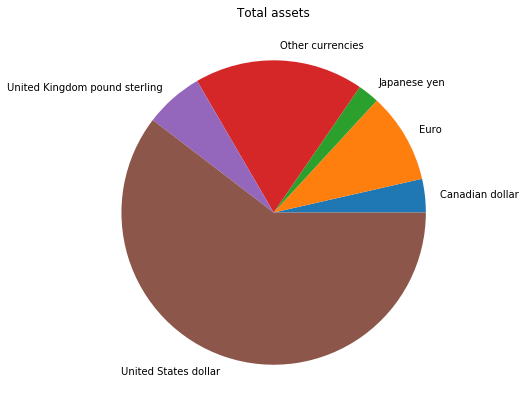

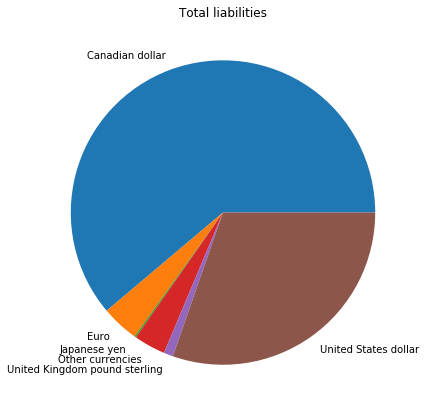

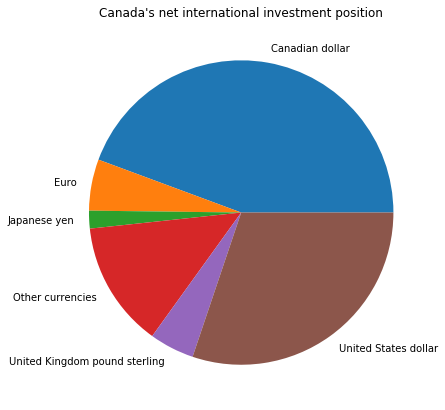

In [8]:
for investment in inve:
    if investment == "Canada's net international investment position":
        axis = data[data["Canada's international investment position"]==investment].groupby(by = "Currency").sum().plot.pie(y = "absVALUE", title = investment, figsize = (7,7), legend = False)
        axis.set_ylabel('')
    else:
        axis = data[data["Canada's international investment position"]==investment].groupby(by = "Currency").sum().plot.pie(y = "VALUE", title = investment, figsize = (7,7), legend = False)
        axis.set_ylabel('')